<a href="https://colab.research.google.com/github/Mikhail-068/NetOptic/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22face_glass%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на датасет
https://drive.google.com/drive/folders/1AHTpiAykv0TaaFU3VLQLCW0CYUSj0wJ7?usp=sharing

# Библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import output
!pip install ultralytics
!pip install cvzone
!pip install mediapipe
output.clear()

In [ ]:
import os
import cv2
from cvzone.FaceDetectionModule import FaceDetector
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Код

In [ ]:
model= YOLO('/content/drive/MyDrive/Glasses/glasses_seg1/run/weights/best.pt')

# Загрузка изображения солнцезащитных очков и лица пользователя
dir_mask = '/content/drive/MyDrive/Glasses/glasses_seg1/img_glass'
file_mask = os.listdir(dir_mask)

dir_face = '/content/drive/MyDrive/Glasses/glasses_seg1/img_face'
file_face = os.listdir(dir_face)

metal_0010.jpg ===========================================================


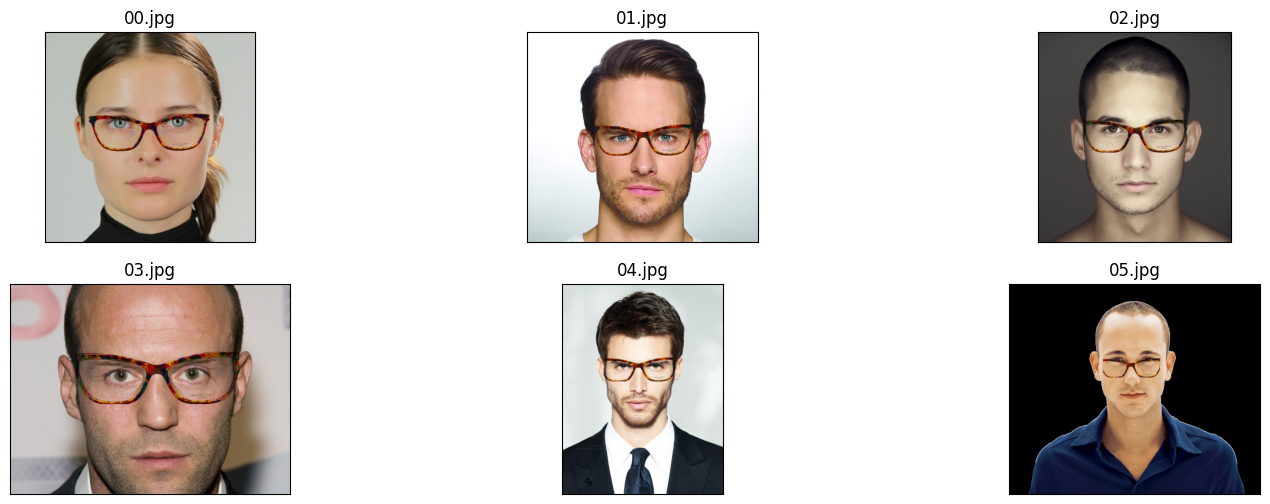

metal_0167.jpg ===========================================================


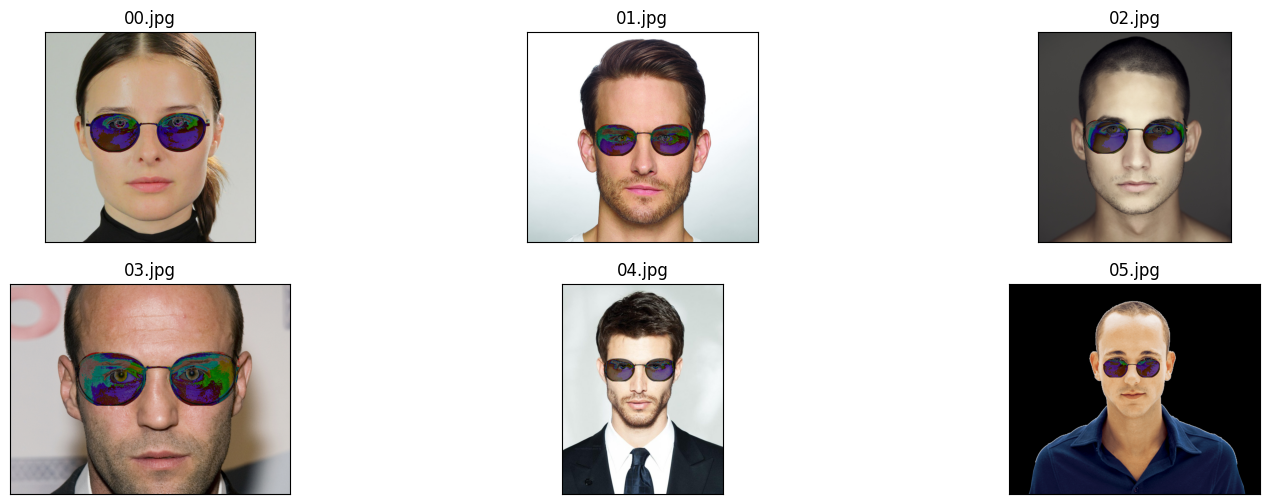

plastic_0008.jpg ===========================================================


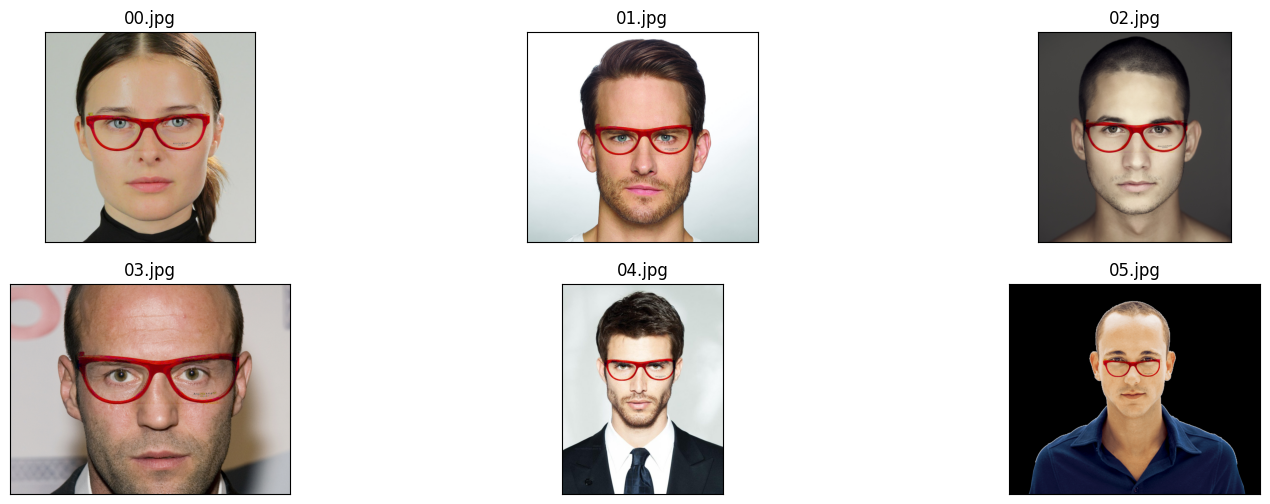

plastic_0088.jpg ===========================================================


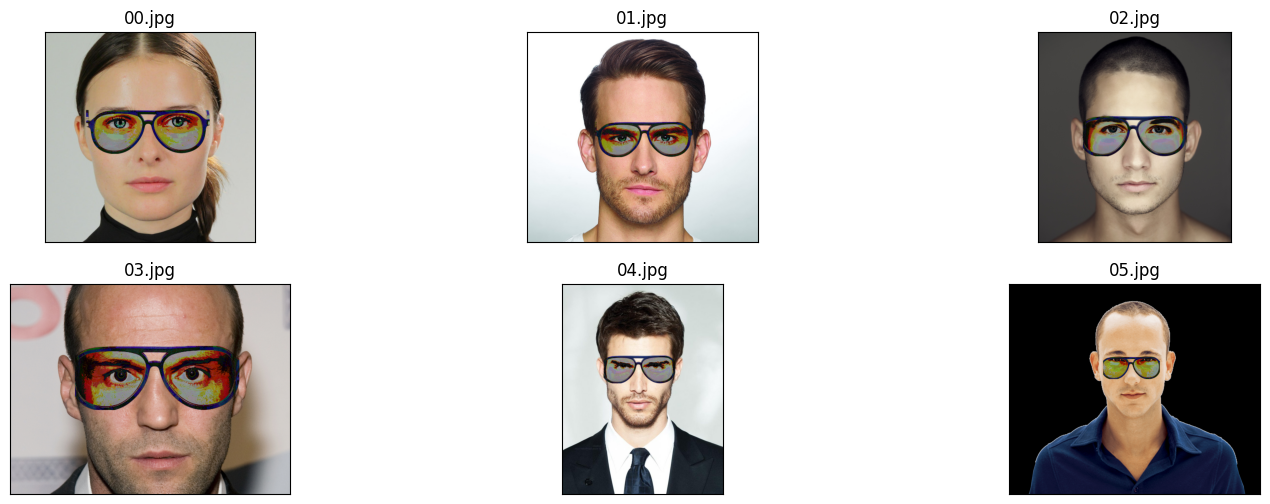

plastic_0027.jpg ===========================================================


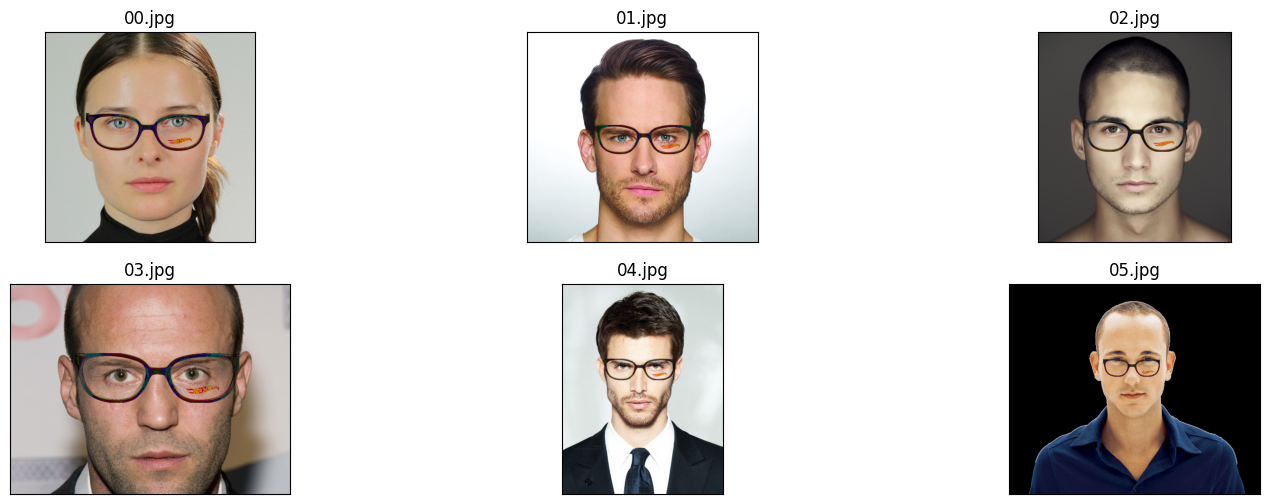

metal_0012.jpg ===========================================================


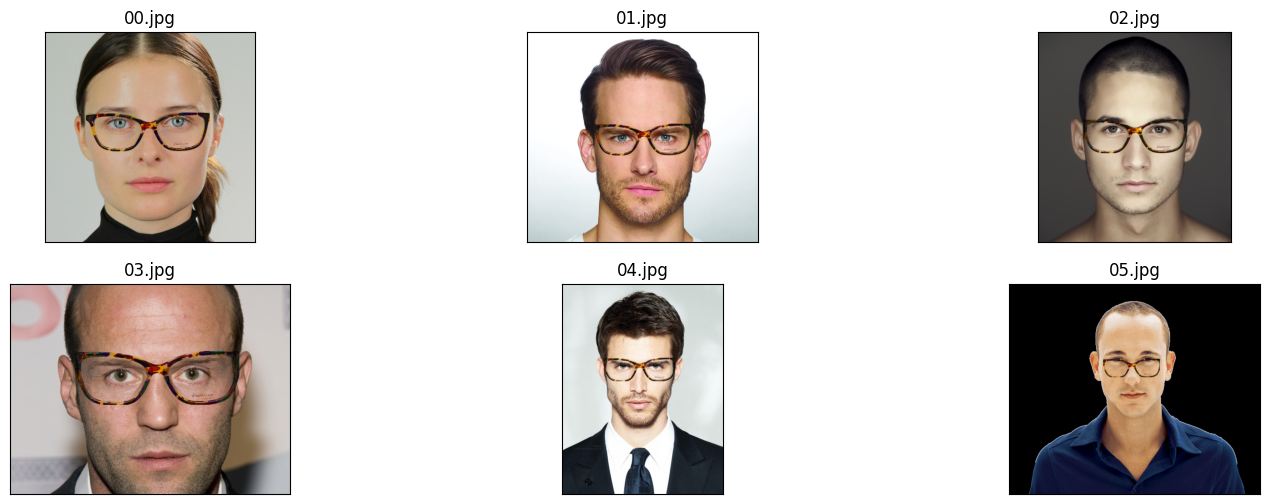

In [ ]:
for f_mask in file_mask:
    f_path = os.path.join(dir_mask, f_mask)
    sunglasses = cv2.imread(f_path, cv2.IMREAD_UNCHANGED)
    sunglasses = cv2.cvtColor(sunglasses, cv2.COLOR_BGR2RGB)
    print(f_mask, '===========================================================')

    lst_face = []
    for f_face in file_face:
        face_path = os.path.join(dir_face, f_face)
        img = cv2.imread(face_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Находим bounding box для очков
        predictions = model.predict(sunglasses, conf=0.8, verbose=False)
        lst_box = predictions[0].boxes.data.tolist()
        index_mask = [lst_box.index(i) for i in lst_box if i[-1] == 0][0]
        x, y, x1, y1 = [i[:4] for i in lst_box if i[-1] == 0][0]
        x, y, x1, y1 = int(x), int(y), int(x1), int(y1)
        sunglasses = sunglasses[y: y1, x: x1]

        hs, ws, _ = sunglasses.shape

        # Находим bounding box для лица
        detector = FaceDetector()
        img, bboxs = detector.findFaces(img, draw=False)

        x, y, w, h = bboxs[0]['bbox']
        x = int(x+(x+w)*0.03)
        w = int(w-(x+w)*0.07)

        # Линия глаз лица
        eye_line1, eye_line2 = (x, int(y+h//3)), (int(x+w), int(y+h//3))


        # Масштабирование солнцезащитных очков в соответствии с размером лица пользователя
        w_res = w
        h_res = int(hs*w/ws)+int(hs*w/ws)%2 # проверяем чётность
        resized_sunglasses = cv2.resize(sunglasses, (w_res, h_res))


        # Определение области интереса (ROI) на лице, где будут накладываться очки
        y1 = eye_line1[1] - h_res//2
        y2 = eye_line1[1] + h_res//2
        roi = img[y1:y2, x:x+w]

        roi_glass = cv2.bitwise_and(roi, resized_sunglasses)
        img[y1:y2, x:x+w] = roi_glass
        lst_face.append(img)


    # Вывод изображений
    plt.figure(figsize=(18, 6))
    for i in range(len(lst_face)):
        plt.subplot(2,3,i+1)
        plt.imshow(lst_face[i])
        plt.title(f'0{i}.jpg')
        plt.xticks([]),plt.yticks([])

    plt.show()
